# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Data Wrangling with Pandas 

Pandas is a very useful Python library for data manipulation and exploration. We have so much more to explore!

In this lesson, we'll continue exploring Pandas for EDA. Specifically: 

- Identify and handle missing values with Pandas.
- Add and remove columns
- Merge datasets
- Use apply functions to clean data with Pandas.

We'll implicitly review many functions from our first Pandas lesson along the way!

## The Superstore dataset

We are going to continue exploring the Superstore dataset, which consist of a few tables stored as .csv files. We will focus on: 

- Products Table (products.csv)
- Orders Table (orders.csv)
- Returns Table (returns.csv)

First we will explore the Orders Table. 

The data dictionary for the Orders table:
- **order_id** - The order identifier value for each order.
- **order_date** - The date the order was placed.
- **ship_date** - The date the order was shipped.
- **ship_mode** - 	The method with which the order was shipped.
- **customer_id** - 	The unique identifier value for the customer who placed the order
- **product_id** - 	The unique identifier value for the product in the order. There may be more than one product ordered for each order_id.
- **sales** - 	The amount of money spent on this particular product in this order
- **quantity** - 	The quantity of this particular product ordered.
- **discount** - 	The discount offered by the sales representative for this product in ths order.
- **profit** -  The amount of profit earned from this order
- **profit_margin** - The profit margin earned from this order


### Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read in the dataset


In [ ]:
# read in the orders dataset
orders = pd.read_csv('datasets/orders.csv')

In [ ]:
# Check the first 5 rows


In [ ]:
# and the number of rows x cols



In [ ]:
# and the data types


In [ ]:
# Check the info()


## Handling missing data

Missing data is a systemic, challenging problem in data collection. Imagine conducting a poll, but some of the data gets lost, or you run out of budget and can't complete it! 😮<br><br>

"Handling missing data" itself is a broad topic. We'll focus on two components:

- Using Pandas to identify we have missing data
- Strategies to fill in missing data (known in the business as `imputing`)
- Filling in missing data with Pandas


### Identifying missing data

Before *handling*, we must identify we're missing data at all!

We have a few ways to explore missing data, and they are reminiscient of our Boolean filters.

First we will use `notnull()` and `isnull()` - can you guess what these will do?

In [ ]:
# notnull() returns True when data isn't missing
orders.notnull().head()

In [ ]:
# isnull() returns True when data is missing
orders.isnull().head()

Now, we may want to see null values in aggregate. We can use `sum()` to sum down a given column.

In [ ]:
# here is a quick and dirty way to do it
orders.isnull().sum() 

# counts the number of missing values
#in each column of the dataframe

Look! We've found missing values!

How could this missing data be problematic for our analysis?

### Understanding missing data

Finding missing data is the easy part! Determining what to do next is more complicated.

Typically, we are most interested in knowing **why** we are missing data. Once we know what 'type of missingness' we have (the source of missing data), we can proceed effectively.

Let's first quantify how much data we are missing. Here is another implementation of `orders.isnull().sum()`, only wrapped with a `DataFrame` and some labels to make it a little more user-friendly:

In [ ]:
# or we can make things pretty as follows

# create a new DataFrame to store the information about nulls
null_df = pd.DataFrame(orders.isnull().sum(), columns=['Count of Nulls']) 

 
#null_df.index.name = "Column"
null_df.sort_values(['Count of Nulls'], ascending=False)

### Filling in missing data

How we fill in data depends largely on why it is missing (types of missingness) and what sampling we have available to us.

We may:

- Delete missing data altogether
- Fill in missing data with:
    - The average of the column
    - The median of the column
    - A predicted amount based on other factors
- Collect more data:
    - Resample the population
    - Follow up with the authority providing data that is missing


In our case, let's focus on handling missing values in `ship_mode`. Let's get a count of the unique values in that column. We will need to use the `dropna=False` kwarg, otherwise the `pd.Series.value_counts()` method will not count `NaN` (null) values.

In [ ]:
# let's get a value count with the nulls included
orders['ship_mode'].value_counts(dropna=False)

Ahoy! We have 4 nulls!

Option 1: Drop the missing values.

In [ ]:
# drops rows where any row has a missing value - 
# this does not happen *in place*, 
# so we are not actually dropping any rows

orders['ship_mode'].dropna()

In [ ]:
# Check that the 4 nulls were dropped from the original row count
orders.shape[0]- 4


In [ ]:
orders.shape

**Important!** `pd.DataFrame.dropna()` and `pd.Series.dropna()` are very versatile! Let's look at the docs (Series is similar):

```python
Signature: pd.DataFrame.dropna(self, axis=0, how='any', thresh=None, subset=None, inplace=False)
Docstring:
Remove missing values.

See the :ref:`User Guide <missing_data>` for more on which values are
considered missing, and how to work with missing data.

Parameters
----------
axis : {0 or 'index', 1 or 'columns'}, default 0
    Determine if rows or columns which contain missing values are
    removed.

    * 0, or 'index' : Drop rows which contain missing values.
    * 1, or 'columns' : Drop columns which contain missing value.

    .. deprecated:: 0.23.0: Pass tuple or list to drop on multiple
    axes.
how : {'any', 'all'}, default 'any'
    Determine if row or column is removed from DataFrame, when we have
    at least one NA or all NA.

    * 'any' : If any NA values are present, drop that row or column.
    * 'all' : If all values are NA, drop that row or column.
thresh : int, optional
    Require that many non-NA values.
subset : array-like, optional
    Labels along other axis to consider, e.g. if you are dropping rows
    these would be a list of columns to include.
inplace : bool, default False
    If True, do operation inplace and return None.
```

**how**: This tells us if we want to remove a row if _any_ of the columns have a null, or _all_ of the columns have a null.<br>
**subset**: We can input an array here, like `['ship_mode', 'discount', 'profit_margin']`, and it will only consider nulls in those columns. This is very useful!<br>
**inplace**: This is if you want to mutate (change) the source dataframe. Default is `False`, so it will return a _copy_ of the source dataframe.

To accomplish the same thing, but implement it on our entire dataframe, we can do the following:

In [ ]:
# drops all nulls from the ship_mode column, 
#but returns the entire dataframe instead of just the ship_mode column

orders.dropna(subset=['ship_mode'])

In [ ]:
# Check that the original dataframe was not actually changed, because default is inplace=False
orders.head()

Option 2: Fill in missing values

Traditionally, we fill missing data with a median, average, or mode (most frequently occurring). For `ship_mode`, let's replace the nulls with the mode, `Standard_Class`.

Let's first look at the way we'd do it with a single column, using the `pd.Series.fillna()` method:

In [ ]:
orders['ship_mode'].fillna(value="Standard Class")

In [ ]:
# Since we didn't set inplace = True, the original dataframe is not changed
orders.head()

Now let's see how we'd do it to the whole dataframe, using the `pd.DataFrame.fillna()` method. Notice the similar API between the methods with the `value` kwarg. Good congruent design, pandas development team! The full dataframe is returned, and not just a column.

In [ ]:
orders.fillna(value={"ship_mode":"Standard Class","discount":0}).head(10)

But wait! There's more! We can reference any other data or formulas we want with the imputation (the value we fill the nulls with). This is very handy if you want to impute with the average or median of that column... or even another column altogether! 

Here is an example where we will fill the nulls of :
- `discount` with the mean value from the `discount` column
- `ship_mode` with the most frequently occuring value (mode)
- `profit_margin` with the result of `profit/sales`.



In [ ]:
# Check the mean value of discount
orders['discount'].mean()

In [ ]:
# Check the most frequently occurring ship_mode
orders['ship_mode'].mode()

Note that this returns `0    Standard Class` 

This is because a the `mode()` function returns a Series, as there may be more than one mode. So if we just want the first value returned, we can use the index 0.


In [ ]:
# Get the first answer from the mode()
orders['ship_mode'].mode()[0]

Now we can also check the result of `profit/sales` which will be calculated for each row, and returned as a Series:

In [ ]:
orders['profit']/orders['sales']

Now we are ready to use a dictionary to fill the missing values!

In [ ]:
orders.fillna(value={'ship_mode':orders['ship_mode'].mode()[0],
                     'discount':orders['discount'].mean(),
                     'profit_margin':orders['profit']/orders['sales']}).head(5)

In [ ]:
orders.head()

#### Really filling in the missing values

When we are sure the logic is correct, we can set `inplace=True` to make the changes permanent.

But first, to be safe... make a copy!

In [ ]:
# Make a copy first!
orders_copy = orders.copy()

# Then fill missing values for the specific columns, inplace
orders.fillna(value={'ship_mode':orders['ship_mode'].mode()[0],
                     'discount':orders['discount'].mean(),
                     'profit_margin':orders['profit']/orders['sales']},
             inplace = True)


In [ ]:

# Check if there are any more nulls
orders.isnull().sum()

In [ ]:
orders_copy.isnull().sum()

In [ ]:
# Can copy back if you need to!
#orders = orders_copy.copy()
#orders.isnull().sum()

They're gone! Important points:

- Don't forget to use the `inplace=True` kwarg to mutate the source dataframe (i.e. 'save changes'). 
- It is helpful to not use `inplace=True` initially to ensure your code/logic is correct, prior to making permanent changes.

## Renaming Columns

Perhaps we want to rename our columns. 

Let's do it with the products table. Read it in and check the first five rows:


In [ ]:
# First read in the Products table

# check the first five rows


The column `product_cost_to_consumer` is actually the unit cost of each product, so let's make it a shorter name.

One way is to rename **specific** columns by using a dictionary:

In [ ]:
# rename one or more columns with a dictionary. Note: inplace=False will return a new DataFrame,
# but leave the original DataFrame untouched. Change this to True to modify the original DataFrame.

# use a dictionary with old column names as the key and new names as the value

old_to_new = {'product_name': 'description', 'product_cost_to_consumer': 'unit_cost'}

products.rename(columns=old_to_new, inplace=False).head(3)

In [ ]:
products.columns

**Note** that the above example has the argument `inplace = False`, so the original DataFrame has not been changed.

Let's set `inplace=True` and change only the `product_cost_to_customer` column name.

In [ ]:
# use a dictionary with old column names as the key and new names as the value
old_to_new = {'product_name': 'description', 'product_cost_to_consumer': 'unit_cost'}

# Now call rename() and set inplace=True so the change is permanent



In [ ]:
products.head()

## Merging Data

You may have noticed that the Orders table doesn't give us information about the product name, product category or subcategory but we may want to get information about the total sales.

We also want to check whether orders have been returned.

To do this, we will have to merge the data from separate tables together, just like we do a JOIN in SQL.

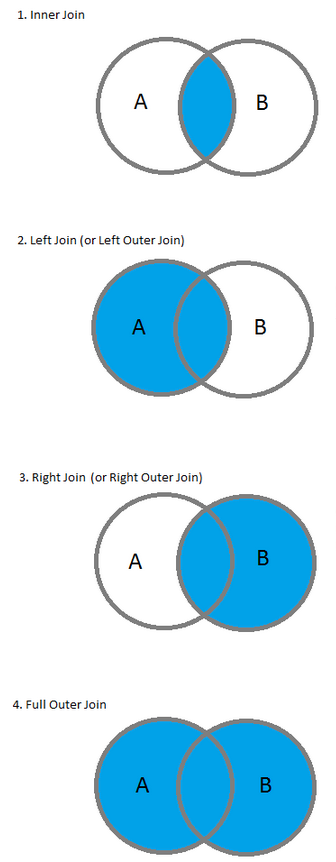
We can do this in Pandas using `merge()`.



#### Merging two DataFrames

We merge two DataFrames using the Pandas `merge` function.

`pd.merge(left, right, how='inner', on=IndexLabel, left_on=IndexLabel, right_on=IndexLabel)`

We can specify **how** to merge the two DataFrames `orders` and `prod` using the `how=` kwarg:

- `how='inner'` - only keep rows where the merge 'on' value exists in both the left and right DataFrames
- `how='left'` - keep every row in the *left* DataFrame. Unmatched columns will be filled with NaN.
- `how='right'` - keep every row in the *right* DataFrame. Unmatched columns will be filled with NaN.
- `how='outer'` - returns all rows from both left and right DataFrames and matches up rows where possible and NaN elsewhere.



#### Guided Walkthrough

Let's try to merge the **Orders** and **Products** tables so that we can analyse the sales by products.



In [ ]:
# Have another look at the products table


In [ ]:
# Compare with the orders that we have 


#### Performing the Merge

In our case, we want to keep all rows in the `orders` DataFrame, and match the rows in the `products` DataFrame based on the `product_id`, so it should be a `left` join (if `orders` is on the left!)

In [ ]:
# Merge orders (left) with products (right) using product_id

# merged = pd.merge(orders, products, how=??? , on=???)


Check the new DataFrame by showing the first 5 rows


#### Adding New Columns

Adding a new column is easy, we just have to define it, for example using calculations on other columns.



In [ ]:
# Create a column total_cost in merged which is the unit_price * quantity
merged['total_cost'] = merged['unit_cost']*merged['quantity']

In [ ]:
# Check the new column
merged.head()

#### Dropping columns

To drop a column, use `drop()` with the column name and kwarg `axis=1`. (To drop rows, we would use the row label and `axis=0)


In [ ]:
merged.drop('total_cost', axis=1, inplace = True)

In [ ]:
merged.head(3)

### Cleaning Data: `str` and `dt` methods
There are a lot of familiar string and date operations we can perform on columns. Strangely, they exist within a pandas submodule and so have to be prefixed with `str` and `dt` respectively.

In [ ]:
# Making the product names lowercase
merged['description'].str.lower().head()

# This doesn't change the original dataframe, so you could add another column if you want the changes to be permanent.

In [ ]:
merged.head()

In [ ]:
# To use datetime methods, convert the date
merged['order_date'] = pd.to_datetime(merged['order_date'])

# Do the same for ship date
merged['ship_date'] = pd.to_datetime(merged['ship_date'])

In [ ]:
merged.dtypes

In [ ]:
merged.head()

In [ ]:
# Calculate the number of days to ship
merged['days_to_ship'] = (merged['ship_date']-merged['order_date'])

# remove the days indicator 
#merged['days_to_ship'] = (merged['ship_date']-merged['order_date']).dt.days

In [ ]:
# year of order
merged['order_year'] = merged['order_date'].dt.year

# month of order (Monday, Tuesday, etc)
merged['order_month_no'] = merged['order_date'].dt.month

# day of week 
merged['order_day'] = merged['order_date'].dt.weekday

# day name of week of order (Monday, Tuesday, etc)
merged['order_day_name'] = merged['order_date'].dt.day_name()


In [ ]:
merged.dtypes

## Apply functions for column operations

Apply functions allow us to perform a complex operation across an entire column highly efficiently.

For example, let's say we want to classify the margin category for the profit margin as *low*, *medium* or *high*.

The first step is writing a function, with the argument being the value we would receive from each cell in the column. This function will mutate the input, and return the result. This result will then be _applied_ to the source dataframe (if desired).

In [ ]:
merged.head()

In [ ]:
# create a function to classify a profit margin as low, medium or high
# Let's say 30% and above is high, between 10% and 30% is medium and anything else is low  

def margin_category(profit_margin):
    if profit_margin >=0.3:
        return 'High'
    elif profit_margin >= 0.1:
        return 'Medium'
    else:
        return 'Low'
    


In [ ]:
# Test the function with a sample value
margin_category(0.57)

Now we can _apply_ this function to our `pd.Series` object, returning the result (which we can use to create a new column, if we choose).

In [ ]:
# Apply the function using the function name
merged['profit_margin'].apply(margin_category)

In [ ]:
# Save the results into a new column
merged['margin_category']=merged['profit_margin'].apply(margin_category)

In [ ]:
merged.head()

The `pd.DataFrame.apply` implementation is similar, however it effectively 'scrolls through' the columns and passes each one sequentially to your function:

```python
Objects passed to the function are Series objects whose index is
either the DataFrame's index (``axis=0``) or the DataFrame's columns
(``axis=1``).
```

It should only be used when you wish to apply the same function to all columns (or rows) of your `pd.DataFrame` object.

We can also use `pd.Series.apply()` with a **lambda expression**. This is an undeclared function and is commonly used for simple functions within the `.apply()` method. Let's use it to add $100 to our `product-cost_to_consumer` column. 

In [ ]:
# prior to apply method
merged['unit_cost'].tail(10)

In [ ]:
# add 100 dollars to each product cost
merged['unit_cost'].apply(lambda x: x+100).tail(10)

Boom! Maybe financing that new boat wasn't such a bad idea after all! Don't worry, we haven't set  new values back to the column so the changes aren't permanent. 

### Saving the file

Now that we have made the changes to our data, how do we save the DataFrame back to file?

We can use the Pandas `to_csv()` function:


In [ ]:
# Saving the merged data to a new file called orders_by_product.csv, without adding an index column
merged.to_csv('datasets/orders_by_product.csv', index=False)